<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/StateModelAnalysis_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#state model import
from statsmodels.tsa.filters.hp_filter import hpfilter


In [4]:
data = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/macrodata.csv", index_col=0, parse_dates=True)
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [18]:
print(data.columns)

Index(['year', 'quarter', 'realgdp', 'realcons', 'realinv', 'realgovt',
       'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint'],
      dtype='object')


In [19]:
#Column name definitions:
#     year      - 1959q1 - 2009q3
#     quarter   - 1-4
#     realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
#                 seasonally adjusted annual rate)
#     realcons  - Real personal consumption expenditures (Bil. of chained
#                 2005 US$, seasonally adjusted annual rate)
#     realinv   - Real gross private domestic investment (Bil. of chained
#                 2005 US$, seasonally adjusted annual rate)
#     realgovt  - Real federal consumption expenditures & gross investment
#                 (Bil. of chained 2005 US$, seasonally adjusted annual rate)
#     realdpi   - Real private disposable income (Bil. of chained 2005
#                 US$, seasonally adjusted annual rate)
#     cpi       - End of the quarter consumer price index for all urban
#                 consumers: all items (1982-84 = 100, seasonally adjusted).
#     m1        - End of the quarter M1 nominal money stock (Seasonally
#                 adjusted)
#     tbilrate  - Quarterly monthly average of the monthly 3-month
#                 treasury bill: secondary market rate
#     unemp     - Seasonally adjusted unemployment rate (%)
#     pop       - End of the quarter total population: all ages incl. armed
#                 forces over seas
#     infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
#     realint   - Real interest rate (tbilrate - infl)</pre>


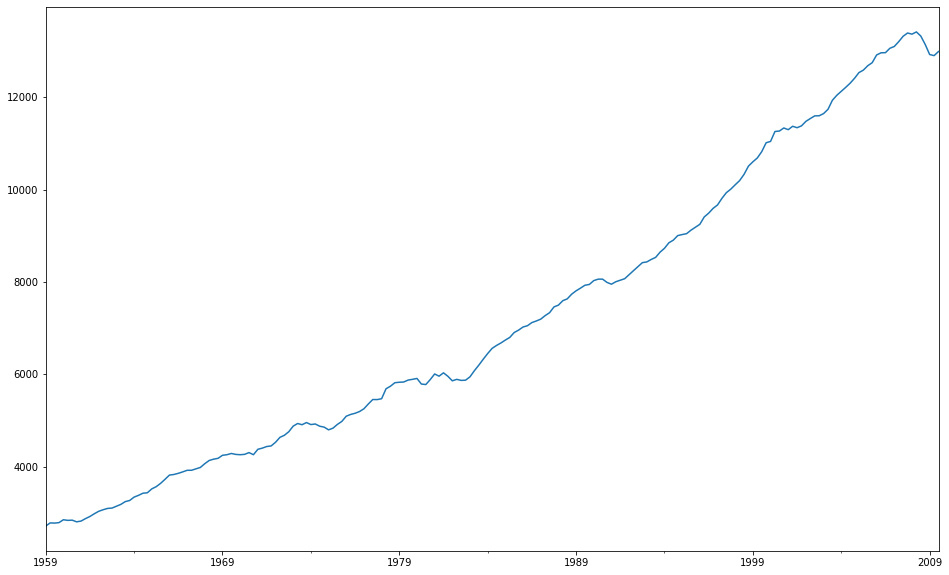

In [21]:
data["realgdp"].plot(figsize=(16, 10))

In [30]:
gdp_cycle, gdp_trend = hpfilter(data['realgdp'], lamb=1600)

In [27]:
gdp_cycle.head()

1959-03-31    39.511915
1959-06-30    80.088532
1959-09-30    48.875455
1959-12-31    30.591933
1960-03-31    64.882667
Name: realgdp, dtype: float64

In [31]:
gdp_trend.head()

1959-03-31    2670.837085
1959-06-30    2698.712468
1959-09-30    2726.612545
1959-12-31    2754.612067
1960-03-31    2782.816333
Name: realgdp, dtype: float64

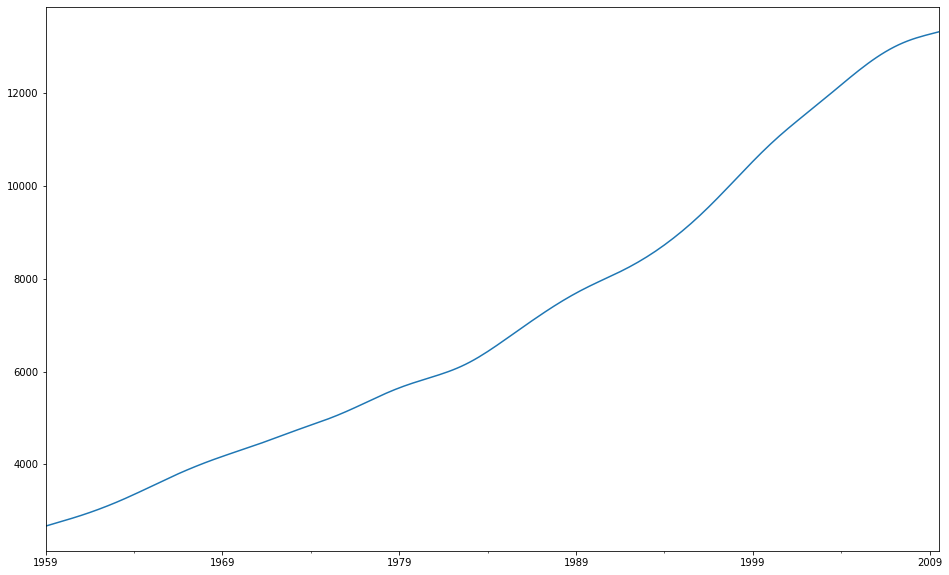

In [32]:
gdp_trend.plot(figsize=(16, 10))

In [33]:
data['gdp_trend'] = gdp_trend
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdp_trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


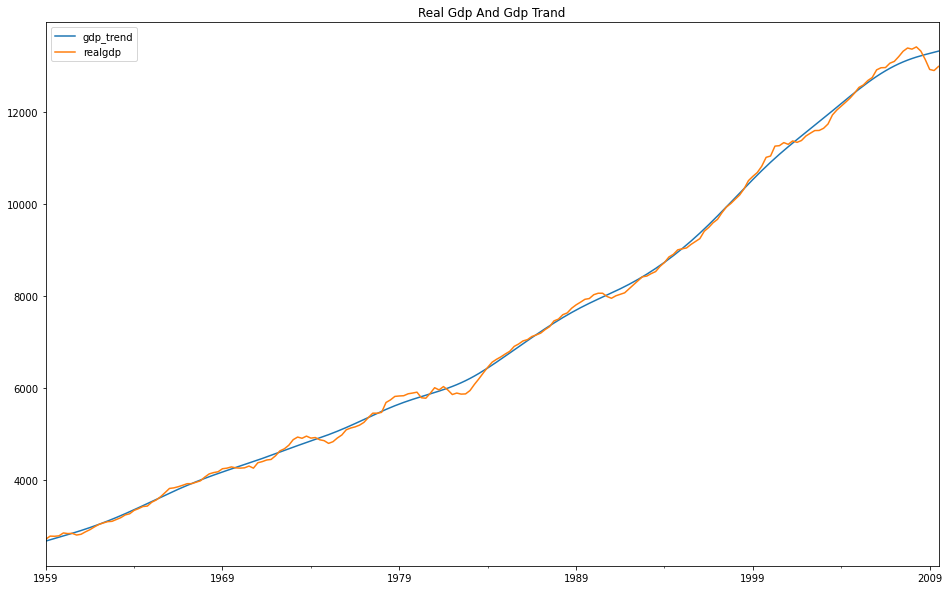

In [37]:
data[['gdp_trend', 'realgdp']].plot(figsize=(16, 10), title="Real Gdp And Gdp Trand")

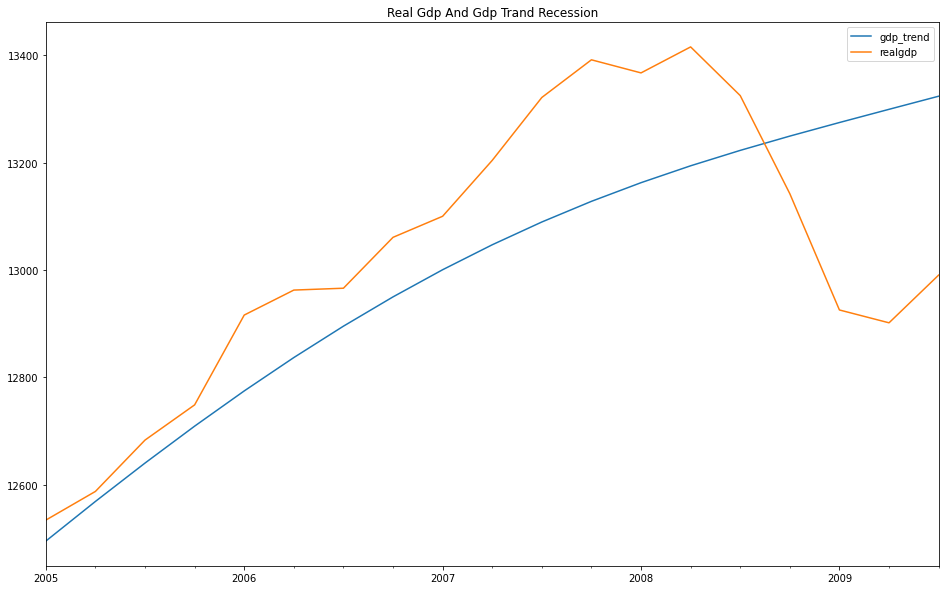

In [39]:
data[['gdp_trend', 'realgdp']]['2005-01-01':].plot(figsize=(16, 10), title="Real Gdp And Gdp Trand Recession")